# 탄소중립을 위한 기후기술 정보 시각화
### (Visualizationof Climate Technology Information for Carbon Neutrality)
## 1. 소개
### 기후기술이란?
**탄소중립 달성**을 위해 온실가스를 감축하고 기후변화에 적응하기 위한 기술을 의미합니다.  
해당 프로젝트에서는, 기후기술과 관련하여 다양한 정보를 수집하고 시각화를 해본 프로젝트입니다.  

### [기후기술 분류 체계](https://www.ctis.re.kr/ko/techClass/classification.do?key=1141)
기후기술은 **감축**, **적응**, **융복합**의 3개 분야의 45개 기술분류로 구분되어 활용되고 있습니다.

In [375]:
sys_type = pd.read_html("https://www.ctis.re.kr/ko/techClass/classification.do?key=1141")
sys_type = sys_type[0]
sys_type.columns = ["대분류", "중분류", "중분류1", "중분류2", "분야", "소분류"]
sys_type["중분류"][20:] = sys_type["중분류"][20:].str.split(")", expand=True)[1]
sys_type["중분류1"][17:] = sys_type["중분류1"][17:].str.split(")", expand=True)[1]
sys_type["중분류2"][17:] = sys_type["중분류2"][17:].str.split(")", expand=True)[1]
sys_type["분야"] = sys_type["분야"].str.split(")", expand=True)[1]
sys_type["소분류"] = sys_type["소분류"].str.split(".", expand=True)[1]

In [376]:
sys_type["대분류"].value_counts()

감축              22
적응              18
감축/  적응  융복합     5
Name: 대분류, dtype: int64

In [378]:
sys_type.describe()

,대분류,중분류,중분류1,중분류2,분야,소분류
count,45,45,45,45,45,45
unique,3,9,11,11,14,45
top,감축,온실가스 저감,에너지 생산 & 공급,발전 & 전환,재생 에너지,원자력 발전
freq,22,20,13,13,8,1


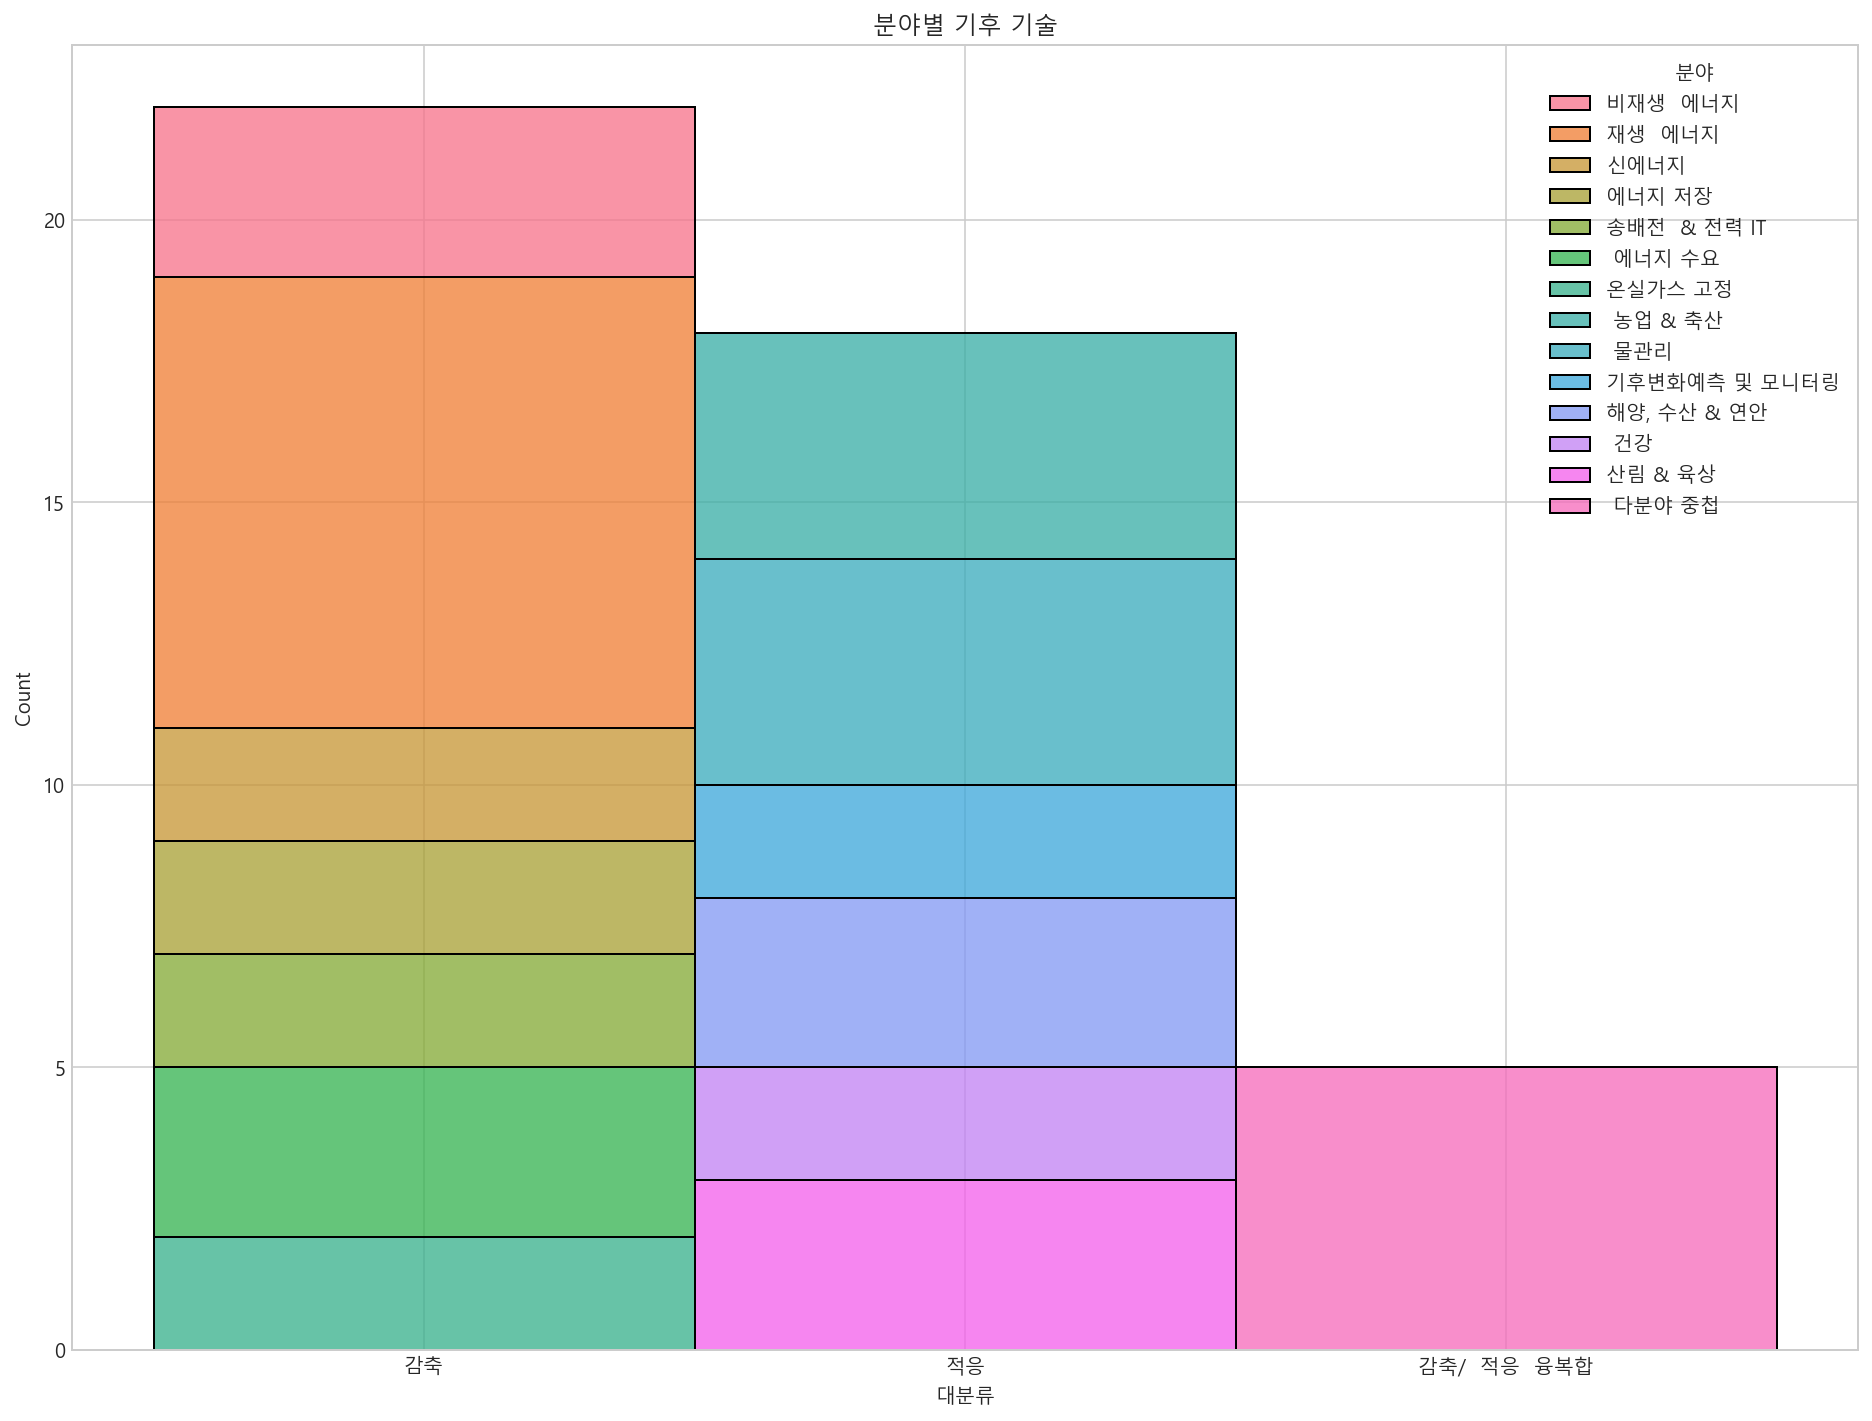

In [412]:
plt.figure(figsize=(16, 12))
_ = sns.histplot(data=sys_type, x="대분류", hue="분야", multiple="stack").set_title("분야별 기후 기술")

In [382]:
px.bar(sys_type, x="대분류", color="분야", title="기후 기술 분류별 분야")

In [383]:
px.bar(sys_type[sys_type["대분류"]=="감축"], x="분야", color="소분류", title="분야별 소분류 (감축)")

In [384]:
px.bar(sys_type[sys_type["대분류"]=="적응"], x="분야", color="소분류", title="분야별 소분류 (적응)")

## 2. 목표
해당 프로젝트의 목적은 기후기술과 관련하여 다양한 정보를 수집하고 시각화하는 것입니다.  

## 3. 사용 데이터 셋
[KOSIS 국가통계포털](https://kosis.kr/statHtml/statHtml.do?orgId=442&tblId=DT_21_01&vw_cd=MT_ZTITLE&list_id=N2_5&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=B4&path=%252FstatisticsList%252FstatisticsListIndex.do)에 등록되어있는 기후 기술 영역 데이터를 이용했습니다.  
  
생각보다 방대한 양의 데이터가 있어, 비슷한 분류끼리 나눠봤습니다.

---
- 기후기술 부문별·기업규모별 매출액 현황 기후기술 부문별·기업규모별 매출액 현황 (2012~2018) -> `sale1218`
- 기후기술 영역별 기관규모별 매출액 기후기술 영역별 기관규모별 매출액 (2019~2020) -> `sale1920`
- 기후기술 부문별·기업규모별 연구개발비 현황 기후기술 부문별·기업규모별 연구개발비 현황 (2012~2018) -> `rnd1218`
- 기후기술 영역별 기관규모별 연구개발비 기후기술 영역별 기관규모별 연구개발비 (2019~2020) -> `rnd1920`
---
- 기후기술 부문별·기업규모별 종사자수 현황 기후기술 부문별·기업규모별 종사자수 현황 (2012~2018) -> `nemp1218`
- 기후기술 영역별 기관규모별 종사자 수 기후기술 영역별 기관규모별 종사자 수 (2019~2020) -> `nemp1920`
- 기후기술 영역별 기관규모별 연구원 수 기후기술 영역별 기관규모별 연구원 수 (2019~2020) -> `nrsc1920`
---
- 기후기술 영역별 기관규모별 수출액 기후기술 영역별 기관규모별 수출액 (2019~2020) -> `per_sale1920`
- 기후기술 영역별 기술수명주기 단계 기후기술 영역별 기술수명주기 단계 (2019~2020) -> `life_cycle1920`
- 기후기술 영역별 기업 및 기관의 누적 특허 건수 기후기술 영역별 기업 및 기관의 누적 특허 건수 (2019~2020) -> `누적특허건수`
- 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 (2019~2019) -> `기술이전실적2019`
- 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 (2020~2020) -> `기술이전실적2020`
- 기후기술 영역별 해외진출지역(복수응답) 기후기술 영역별 해외진출지역(복수응답) (2019~2020) -> `해외진출지역`
- 기후기술 영역별 국내/해외 기술이전 방식 기후기술 영역별 국내/해외 기술이전 방식 (2019~2019) -> `기술이전방식2019`
- 기후기술 영역별 국내 기술이전 선호 항목(복수응답) 기후기술 영역별 국내 기술이전 선호 항목(복수응답) (2020~2020) -> `기술이전선호항목2020`
---
- 기후기술 영역별 정부지원 사업 수혜 여부 및 정책수단 종류(복수응답) 기후기술 영역별 정부지원 사업 수혜 여부 및 정책수단 종류(복수응답) (2019~2020) -> `정책`
---

## 4. 구현

#### 라이브러리 로드

In [6]:
# For Scraping
import requests
from bs4 import BeautifulSoup as bs
# For data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [7]:
# For convert plotly to iframe
import chart_studio
import chart_studio.tools as ct
import chart_studio.plotly as cp
# convert plotly to iframe
# ct.get_embed(cp.plot(fig, filename= , auto_open=Fasle))

In [8]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


plt.style.use("seaborn-whitegrid")

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats

%config InlineBackend.figure_format = "retina"

### 1. Data Load

In [11]:
# 기후기술 인력 관련
'''
- 기후기술 부문별·기업규모별 종사자수 현황 기후기술 부문별·기업규모별 종사자수 현황 (2012~2018) -> `nemp1218`
- 기후기술 영역별 기관규모별 종사자 수 기후기술 영역별 기관규모별 종사자 수 (2019~2020) -> `nemp1920`
- 기후기술 영역별 기관규모별 연구원 수 기후기술 영역별 기관규모별 연구원 수 (2019~2020) -> `nrsc1920`
'''
df_nemp1218 = pd.read_csv("data/nemp1218.csv", encoding="cp949")
df_nemp1920 = pd.read_csv("data/nemp1920.csv", encoding="cp949")
df_nrsc1920 = pd.read_csv("data/nrsc1920.csv", encoding="cp949")

In [3]:
# 기후기술 매출 & 개발 비용 관련
'''
- 기후기술 부문별·기업규모별 매출액 현황 기후기술 부문별·기업규모별 매출액 현황 (2012~2018) -> `sale1218`
- 기후기술 영역별 기관규모별 매출액 기후기술 영역별 기관규모별 매출액 (2019~2020) -> `sale1920`
- 기후기술 부문별·기업규모별 연구개발비 현황 기후기술 부문별·기업규모별 연구개발비 현황 (2012~2018) -> `rnd1218`
- 기후기술 영역별 기관규모별 연구개발비 기후기술 영역별 기관규모별 연구개발비 (2019~2020) -> `rnd1920`
'''
pass

In [1]:
# 기후기술 수출 관련
'''
- 기후기술 영역별 기관규모별 수출액 기후기술 영역별 기관규모별 수출액 (2019~2020) -> `per_sale1920`
- 기후기술 영역별 기술수명주기 단계 기후기술 영역별 기술수명주기 단계 (2019~2020) -> `life_cycle1920`
- 기후기술 영역별 기업 및 기관의 누적 특허 건수 기후기술 영역별 기업 및 기관의 누적 특허 건수 (2019~2020) -> `누적특허건수`
- 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 (2019~2019) -> `기술이전실적2019`
- 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 기후기술 영역별 기술이전 수행 및 기술료 징수 실적 (2020~2020) -> `기술이전실적2020`
- 기후기술 영역별 해외진출지역(복수응답) 기후기술 영역별 해외진출지역(복수응답) (2019~2020) -> `해외진출지역`
- 기후기술 영역별 국내/해외 기술이전 방식 기후기술 영역별 국내/해외 기술이전 방식 (2019~2019) -> `기술이전방식2019`
- 기후기술 영역별 국내 기술이전 선호 항목(복수응답) 기후기술 영역별 국내 기술이전 선호 항목(복수응답) (2020~2020) -> `기술이전선호항목2020`
'''
# 기후기술 지원 정부 정책
'''
- 기후기술 영역별 정부지원 사업 수혜 여부 및 정책수단 종류(복수응답) 기후기술 영역별 정부지원 사업 수혜 여부 및 정책수단 종류(복수응답) (2019~2020) -> `정책`
'''
pass

### 2. Data Preprocessing & EDA
##### 데이터 소개 - 결측치 확인 - 중복값 확인 - 병합 - 고유값 확인
##### 타입 확인 - 이상치 확인 - 전체 수치 변수의 히스토그램 - 수치 데이터 기술 통계 - 범주 데이터 기술 통계 - 파생 변수 - 상관 계수 - 데이터 집계

#### 1. 기후기술 인력
- `df_nemp1218`: 2012 ~ 2018년, 종사자 현황
- `df_nemp1920`: 2019 ~ 2020년, 종사자 현황
- `df_nrsc1920`: 2019 ~ 2020년, 연구원 현황

In [13]:
print(f"df_nemp1218: {df_nemp1218.shape}\ndf_nemp1920: {df_nemp1920.shape}\ndf_nrsc1920: {df_nrsc1920.shape}")

df_nemp1218: (490, 5)
df_nemp1920: (210, 5)
df_nrsc1920: (209, 5)


##### 초기 데이터 맞추기
기후기술 인력과 관련된 데이터의 컬럼명과 순서를 맞춰줬습니다.  
매출액의 경우, 기업 규모와 연관 지을 수 있는 부분이라 기업 규모로 일치 시켰습니다.

In [35]:
# 컬럼명 변경
df_nemp1218.columns = ["기업규모", "대분류", "분야", "연도", "종사자"]

In [26]:
df_nemp1218.sample(10)

,기업규모,대분류,분야,연도,종사자수
92,전체,감축 및 적응 융복합,감축 및 적응 융복합,2013,4247
474,연구소 등 비영리기관,적응,물,2017,74
310,중소기업,감축,비재생에너지,2014,1224
289,중견기업,감축 및 적응 융복합,감축 및 적응 융복합,2014,2225
436,연구소 등 비영리기관,감축,송배전 및 에너지관리,2014,400
126,대기업,감축,신에너지,2012,1789
239,중견기업,감축,송배전 및 에너지관리,2013,3020
470,연구소 등 비영리기관,적응,물,2013,74
158,대기업,감축,온실가스 고정,2016,13
95,전체,감축 및 적응 융복합,감축 및 적응 융복합,2016,4098


In [33]:
# 컬럼명 변경
df_nemp1920.columns = ["대분류", "분야", "기업규모", "연도", "종사자"]
df_nemp1920 = df_nemp1920[["기업규모", "대분류", "분야", "연도", "종사자"]]

In [34]:
df_nemp1920.sample(10)

,기업규모,대분류,분야,연도,종사자
21,"600억 원 이상 2,000억 원 미만",감축,소계,2019 p),19165
110,"1,000억 원 이상 2,000억 원 미만",감축,온실가스 고정,2020,23
56,100억 원 이상 500억 원 미만,감축,신에너지,2020,732
113,"2,000억 원 이상",감축,온실가스 고정,2019 p),-
188,100억 원 이상 500억 원 미만,융복합,소계,2020,280
161,"2,000억 원 이상",적응,예측?모니터링,2020,-
156,전체,적응,예측?모니터링,2020,180
99,"600억 원 이상 2,000억 원 미만",감축,에너지수요,2019 p),6801
29,100억 원 미만,감축,비재생에너지,2020,418
130,전체,적응,농업&축산,2019 p),9822


In [36]:
# 컬럼명 변경
df_nrsc1920.columns = ["대분류", "분야", "기업규모", "연도", "종사자"]
df_nrsc1920 = df_nrsc1920[["기업규모", "대분류", "분야", "연도", "종사자"]]

In [37]:
df_nrsc1920.sample(10)

,기업규모,대분류,분야,연도,종사자
126,"2,000억 원 이상",적응,소계,2020,1745
60,"600억 원 이상 2,000억 원 미만",감축,신에너지,2019 p),48
200,100억 원 이상 500억 원 미만,융복합,감축 및 적응 융복합,2020,87
164,100억 원 이상 500억 원 미만,적응,해양수산연안,2020,3
38,기타(공공기관),감축,비재생에너지,2020,3112
25,기타(공공기관),감축,소계,2020,7191
41,100억 원 미만,감축,재생에너지,2019 p),2652
0,전체,합계,소계,2019 p),56520
20,100억 원 이상 600억 원 미만,감축,소계,2019 p),5643
109,"1,000억 원 이상 2,000억 원 미만",감축,온실가스 고정,2020,6


##### 데이터 확인
결측치, 데이터 타입 등 확인

In [47]:
df_nemp1218.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기업규모    490 non-null    object
 1   대분류     490 non-null    object
 2   분야      490 non-null    object
 3   연도      490 non-null    int64 
 4   종사자     490 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.3+ KB


In [51]:
df_nemp1218.isnull().sum()

기업규모    0
대분류     0
분야      0
연도      0
종사자     0
dtype: int64

In [44]:
df_nemp1920.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기업규모    210 non-null    object
 1   대분류     210 non-null    object
 2   분야      210 non-null    object
 3   연도      210 non-null    object
 4   종사자     210 non-null    object
dtypes: object(5)
memory usage: 8.3+ KB


In [52]:
df_nemp1920.isnull().sum()

기업규모    0
대분류     0
분야      0
연도      0
종사자     0
dtype: int64

In [45]:
df_nrsc1920.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기업규모    209 non-null    object
 1   대분류     209 non-null    object
 2   분야      209 non-null    object
 3   연도      209 non-null    object
 4   종사자     209 non-null    object
dtypes: object(5)
memory usage: 8.3+ KB


In [53]:
df_nrsc1920.isnull().sum()

기업규모    0
대분류     0
분야      0
연도      0
종사자     0
dtype: int64

`df_nemp1218`(2012~2018년도 종사자) 데이터에서는 `종사자`가 `object` 타입으로 들어있고,  
`df_nemp1920`(2019~2020년도 종사자)와 `df_nrsc1920`(2019~2020년도 연구원)에서는 `연도`가 `object` 타입으로 들어있습니다.  
해당 부분은 각각 `datetime`타입과 `int`타입으로 변경해야할꺼 같습니다.


##### 의문점) 종사자와 연구원의 차이?
2012년도부터 2018년도까지는 **종사자**라는 명칭을 사용하고 있지만, 2019년도부터 2020년도 데이터에서는 **종사자**와 **연구원**으로 분리되어 있습니다.  
제가가진 지식선에서는, 종사자는 해당 분야에 종사하는 모든 사람들이고, 연구원도 종사자에 포함되어있는거라고 생각했습니다.  
인력의 수가 1~2년 사이에 큰 변화가 없다면, 종사자와 연구자를 종사자로 통일해 사용해도 될꺼 같다는 생각이 들어 이를 확인해봤습니다.

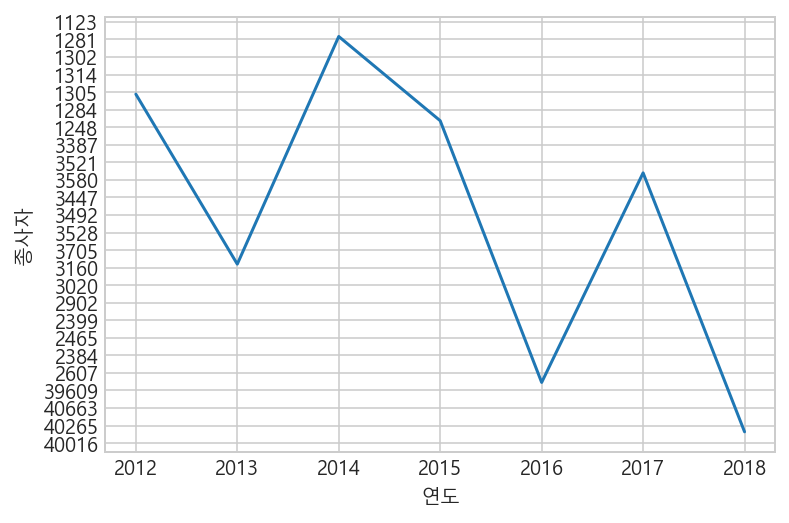

## 5. 결론